Business Objective: This is a sample dataset which consists of 20,000reviews and ratings for different hotels and our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel and major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text  import TfidfVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#from google.colab import files
#upload=files.upload()

In [5]:
df=pd.read_excel("hotel_reviews (2).xlsx")

In [6]:
df

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  int64  
 2   @       0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.4+ KB


In [8]:
df.isnull().sum()

Review        0
Rating        0
@         20491
dtype: int64

In [9]:
df.shape

(20491, 3)

In [10]:
df[df.duplicated()]

,Review,Rating,@


In [11]:
df.describe()

,Rating,@
count,20491.000000,0.0
mean,3.952223,NaN
std,1.233030,NaN
min,1.000000,NaN
25%,3.000000,NaN
50%,4.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


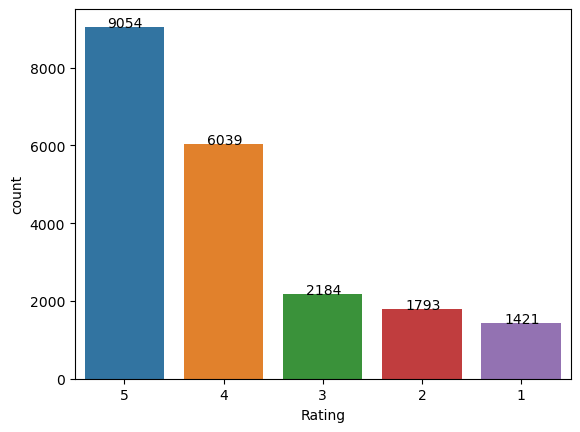

In [12]:
#plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['Rating'],data=df,order=df['Rating'].value_counts().index)
for p,label in zip(ax.patches,df['Rating'].value_counts()):
  ax.annotate(label,(p.get_x()+0.23,p.get_height()))

In [13]:
#downloadede the stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords=set(stopwords.words('english'))

In [15]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
#removed 'not' from the stopwords
stopwords.remove('not')

In [17]:
len(stopwords)

178

In [18]:
#here i added some words to stopword to remove them from data
my_stopword=["hotel","stayed","cn","nt","rt"]

In [19]:
#union is used to join stopwords and my_stopwords
stopwords=stopwords.union(my_stopword)

In [20]:
len(stopwords)

183

In [21]:
#deffining a function to clean the text
def clean_text(text):
  text=text.lower()
  text=re.sub('[^a-z ]','',text)
  text=text.split()
  text=[word for word in text if word not in stopwords]
  text=" ".join(text)
  return text

In [22]:
#importing the vader to find the polarity of the sentence
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [23]:
sar=SentimentIntensityAnalyzer()

In [24]:
#applying the clean_text function on Review column
df['cleaned_text']=df['Review'].apply(clean_text)

In [25]:
df

,Review,Rating,@,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN,best kept secret rd time staying charm not sta...
20487,great location price view hotel great quick pl...,4,NaN,great location price view great quick place si...
20488,"ok just looks nice modern outside, desk staff ...",2,NaN,ok looks nice modern outside desk staff partic...
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN,theft ruined vacation opened sept guests week ...


In [26]:
#finding the polarity score for each row
df['polarity']=df['cleaned_text'].apply(lambda x:sar.polarity_scores(x)['compound'])

In [27]:
df

,Review,Rating,@,cleaned_text,polarity
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN,best kept secret rd time staying charm not sta...,0.9875
20487,great location price view hotel great quick pl...,4,NaN,great location price view great quick place si...,0.9753
20488,"ok just looks nice modern outside, desk staff ...",2,NaN,ok looks nice modern outside desk staff partic...,0.8622
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN,theft ruined vacation opened sept guests week ...,0.9860


In [28]:
#defining a function to find the sentiment
def category(x):
  if x >=4:
    return 'Positive'
  if x <=2:
    return 'Negative'
  else:
    return 'Neutral'

In [29]:
df['Type']=df['Rating'].apply(category)

In [30]:
df.Type.value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Type, dtype: int64

In [31]:
df

,Review,Rating,@,cleaned_text,polarity,Type
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN,best kept secret rd time staying charm not sta...,0.9875,Positive
20487,great location price view hotel great quick pl...,4,NaN,great location price view great quick place si...,0.9753,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,NaN,ok looks nice modern outside desk staff partic...,0.8622,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN,theft ruined vacation opened sept guests week ...,0.9860,Negative


from the above plot  we can see that negative comments also have high ratings of 4 and 5.

from the above plot  we can see that positive comments also have high ratings of 1 and 2

In [32]:
positive_comments=df[df['Type']=='Positive']

In [33]:
poss_wo=" ".join(word.split()[3] for word in positive_comments.cleaned_text)

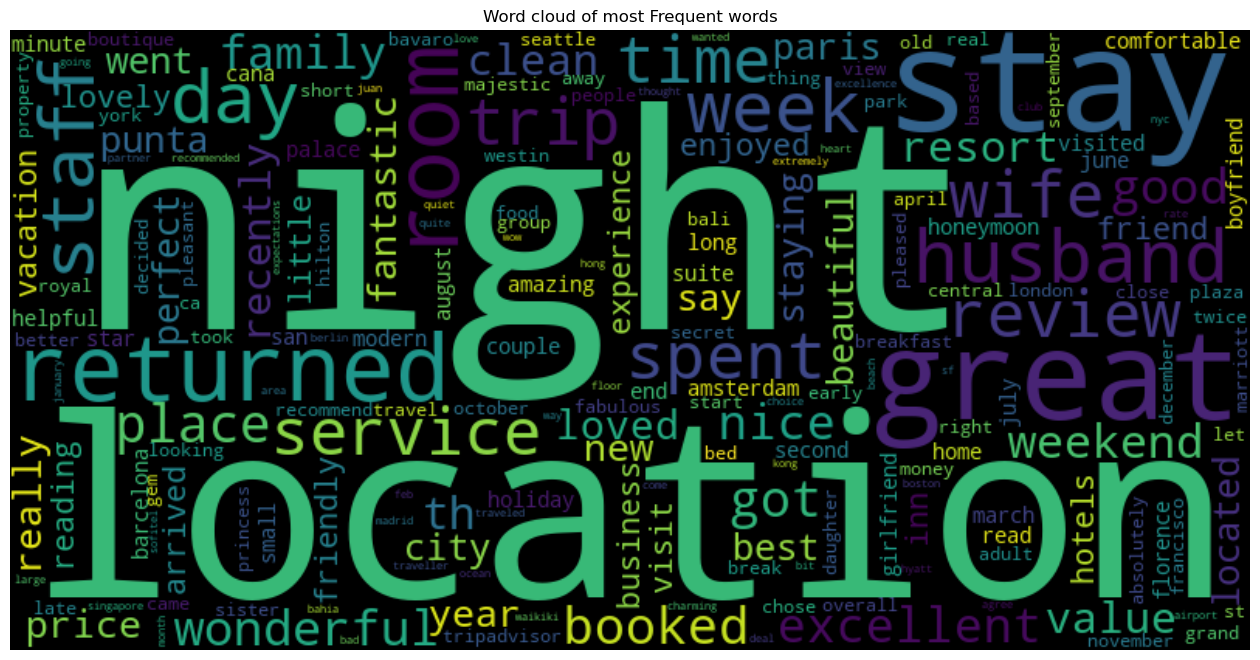

In [34]:
#most used positive comments
wc=WordCloud(width=800,height=400,background_color='black').generate(poss_wo)
plt.figure(figsize=(16,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most Frequent words')
plt.show()

these are the word wich are highly used words in positive comments

In [35]:
cv = CountVectorizer(ngram_range=(2,2))
X=cv.fit_transform(positive_comments['cleaned_text'])
word=cv.vocabulary_

In [36]:
pos_list=pd.DataFrame(list(word.items()),columns=['bigram','freq'])

<Axes: xlabel='bigram'>

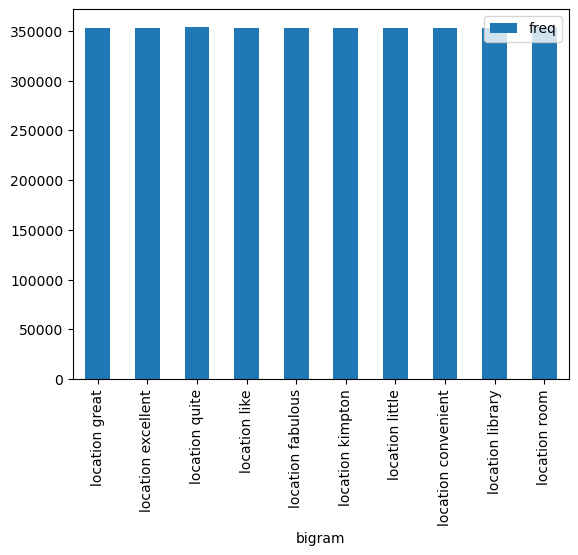

In [37]:
pos_list[pos_list['bigram'].str.match('location')].head(10).plot(x='bigram',kind='bar')

*Here* we can see that,what are the top 10 positive comments regarding the
location of the hotel

---



<Axes: xlabel='bigram'>

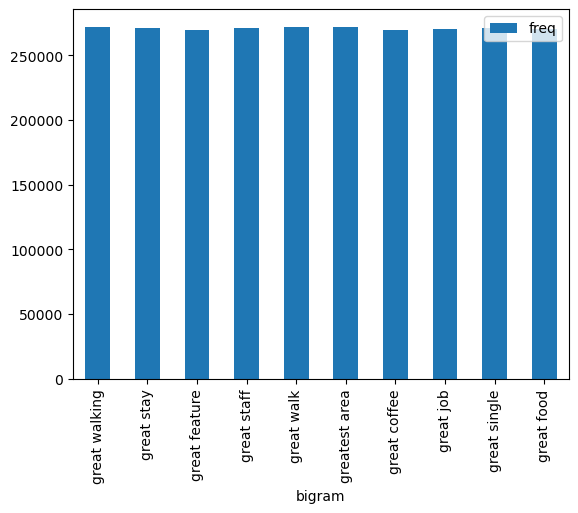

In [38]:
pos_list[pos_list['bigram'].str.match('great')].head(10).plot(x='bigram',y='freq',kind='bar')

from this plot we can see that, what all are the great things wich have been talked about the hotel

In [39]:
negative_comments=df[df['Type']=='Negative']

In [40]:
neg_wo=" ".join(word.split()[3] for word in negative_comments.cleaned_text)

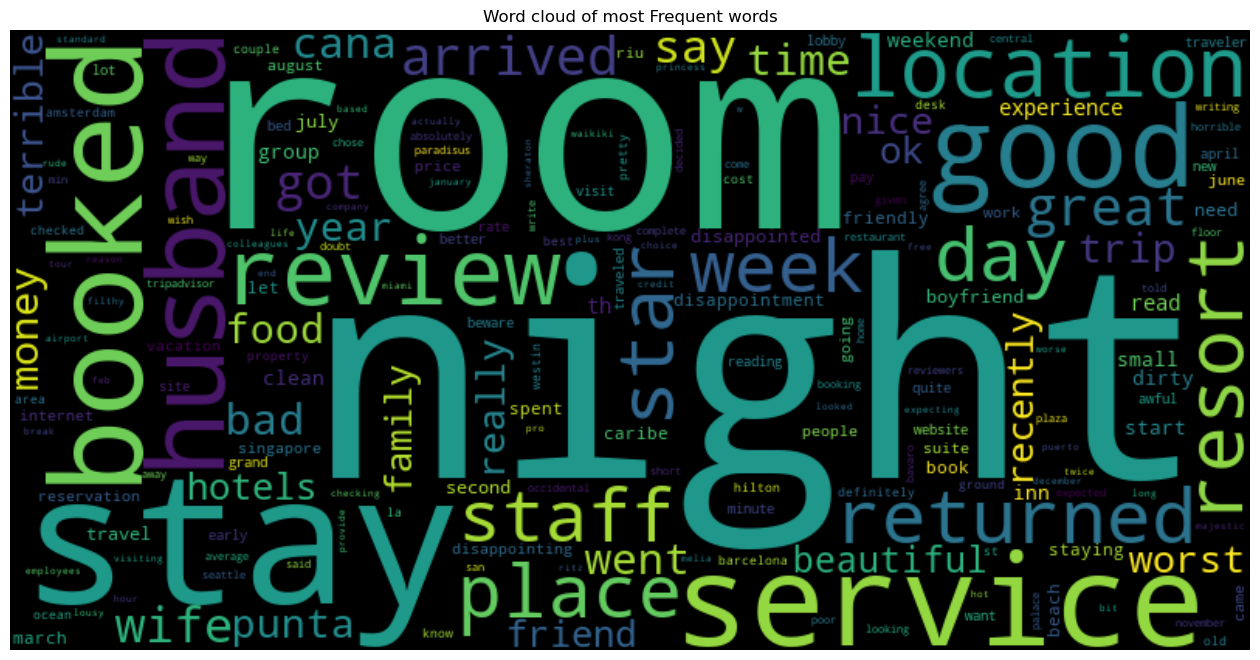

In [41]:
#most used negative comments
wc=WordCloud(width=800,height=400,background_color='black').generate(neg_wo)
plt.figure(figsize=(16,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most Frequent words')
plt.show()

these are the word wich are highly used words in negative comments

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
X1=cv.fit_transform(negative_comments['cleaned_text'])
word1=cv.vocabulary_

In [43]:
neg_list=pd.DataFrame(list(word1.items()),columns=['bigram','freq'])

<Axes: xlabel='bigram'>

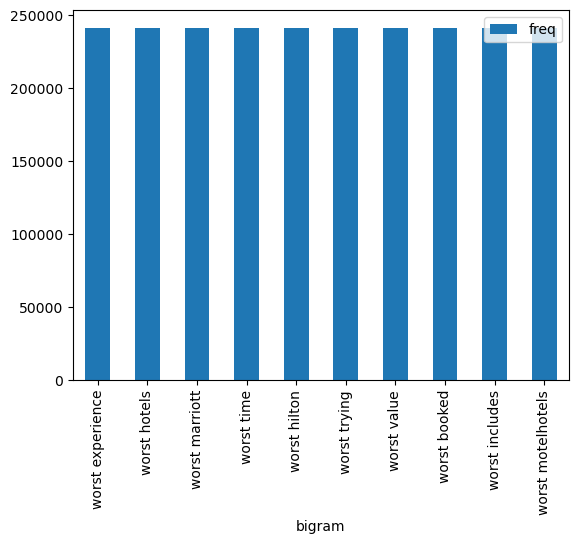

In [44]:
neg_list[neg_list['bigram'].str.match('worst')].head(10).plot(x='bigram',kind='bar')

this plot shows that what all are the comments mentioned about **worst**

<Axes: xlabel='bigram'>

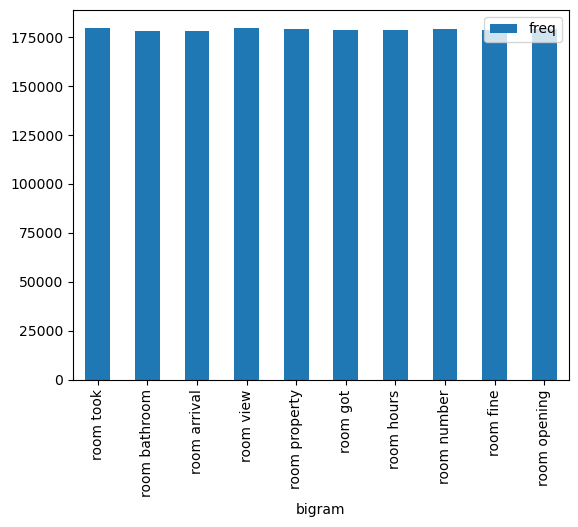

In [45]:
neg_list[neg_list['bigram'].str.match('room')].head(10).plot(x='bigram',kind='bar')

<Axes: xlabel='bigram'>

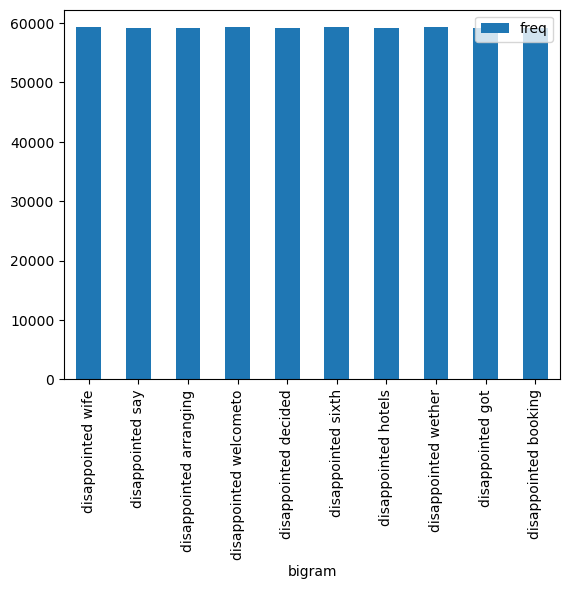

In [46]:

neg_list[neg_list['bigram'].str.match('disappointed')].head(10).plot(x='bigram',kind='bar')

In [47]:
df['text_count']=df['Review'].str.len()

In [48]:
df

,Review,Rating,@,cleaned_text,polarity,Type,text_count
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive,593
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral,1427
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive,1281
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN,best kept secret rd time staying charm not sta...,0.9875,Positive,733
20487,great location price view hotel great quick pl...,4,NaN,great location price view great quick place si...,0.9753,Positive,306
20488,"ok just looks nice modern outside, desk staff ...",2,NaN,ok looks nice modern outside desk staff partic...,0.8622,Negative,443
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN,theft ruined vacation opened sept guests week ...,0.9860,Negative,5557


<Axes: xlabel='Type', ylabel='text_count'>

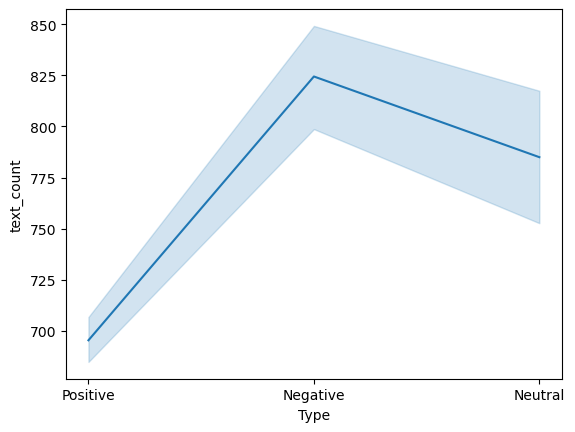

In [49]:
#count of the text used in respective comments
sns.lineplot(x='Type',y='text_count',data=df)

when review is positive,the length of the comment is more and it dicreases when the reviews are negative and neutral

In [50]:
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
from nltk.tokenize import word_tokenize
df['tokenized']=df['cleaned_text'].apply(lambda x: nltk.word_tokenize(x))

In [52]:
df.head()

,Review,Rating,@,cleaned_text,polarity,Type,text_count,tokenized
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive,593,"[nice, expensive, parking, got, good, deal, st..."
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative,1689,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral,1427,"[nice, rooms, not, experience, monaco, seattle..."
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive,600,"[unique, great, stay, wonderful, time, monaco,..."
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive,1281,"[great, stay, great, stay, went, seahawk, game..."


In [53]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()

#stemmed_tokens=[ps.stem(word) for word in lower_words]
# creating other Column
df['stemmed'] = df['tokenized'].apply(lambda x: " ".join([ps.stem(word) for word in x]))
df.head()

,Review,Rating,@,cleaned_text,polarity,Type,text_count,tokenized,stemmed
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive,593,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral,1427,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good levelp...
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive,600,"[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive,1281,"[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...


In [54]:
from nltk.stem import WordNetLemmatizer
lematizer=WordNetLemmatizer()


In [55]:
df['lemmas'] = df['tokenized'].apply(lambda x: " ".join([lematizer.lemmatize(word) for word in x]))


In [56]:
df.head()

,Review,Rating,@,cleaned_text,polarity,Type,text_count,tokenized,stemmed,lemmas
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive,593,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...,nice expensive parking got good deal stay anni...
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral,1427,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good levelp...,nice room not experience monaco seattle good l...
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive,600,"[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...,unique great stay wonderful time monaco locati...
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive,1281,"[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label_y']=encoder.fit_transform(df['Type'])

In [58]:
df

,Review,Rating,@,cleaned_text,polarity,Type,text_count,tokenized,stemmed,lemmas,label_y
0,nice hotel expensive parking got good deal sta...,4,NaN,nice expensive parking got good deal stay anni...,0.9747,Positive,593,"[nice, expensive, parking, got, good, deal, st...",nice expens park got good deal stay anniversar...,nice expensive parking got good deal stay anni...,2
1,ok nothing special charge diamond member hilto...,2,NaN,ok nothing special charge diamond member hilto...,0.9849,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,3,NaN,nice rooms not experience monaco seattle good ...,0.9923,Neutral,1427,"[nice, rooms, not, experience, monaco, seattle...",nice room not experi monaco seattl good levelp...,nice room not experience monaco seattle good l...,1
3,"unique, great stay, wonderful time hotel monac...",5,NaN,unique great stay wonderful time monaco locati...,0.9949,Positive,600,"[unique, great, stay, wonderful, time, monaco,...",uniqu great stay wonder time monaco locat exce...,unique great stay wonderful time monaco locati...,2
4,"great stay great stay, went seahawk game aweso...",5,NaN,great stay great stay went seahawk game awesom...,0.9913,Positive,1281,"[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,2
...,...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN,best kept secret rd time staying charm not sta...,0.9875,Positive,733,"[best, kept, secret, rd, time, staying, charm,...",best kept secret rd time stay charm not star c...,best kept secret rd time staying charm not sta...,2
20487,great location price view hotel great quick pl...,4,NaN,great location price view great quick place si...,0.9753,Positive,306,"[great, location, price, view, great, quick, p...",great locat price view great quick place sight...,great location price view great quick place si...,2
20488,"ok just looks nice modern outside, desk staff ...",2,NaN,ok looks nice modern outside desk staff partic...,0.8622,Negative,443,"[ok, looks, nice, modern, outside, desk, staff...",ok look nice modern outsid desk staff particul...,ok look nice modern outside desk staff particu...,0
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN,theft ruined vacation opened sept guests week ...,0.9860,Negative,5557,"[theft, ruined, vacation, opened, sept, guests...",theft ruin vacat open sept guest week happi st...,theft ruined vacation opened sept guest week h...,0


In [59]:
df['label_y'].value_counts()

2    15093
0     3214
1     2184
Name: label_y, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(df['lemmas'],df['label_y'],test_size=0.20,random_state=50)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdf=TfidfVectorizer(max_features=7000)


In [63]:
x_train=tdf.fit_transform(x_train).toarray()
x_test=tdf.transform(x_test).toarray()

In [64]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
log_acc=accuracy_score(log_pred,y_test)
print("Test accuracy: {:.2f}%".format(log_acc*100))

Test accuracy: 85.78%


In [68]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       681
           1       0.51      0.19      0.28       452
           2       0.88      0.98      0.93      2966

    accuracy                           0.86      4099
   macro avg       0.74      0.65      0.67      4099
weighted avg       0.83      0.86      0.83      4099



In [69]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred=mnb.predict(x_test)
mnb_acc=accuracy_score(mnb_pred,y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 80.85%


In [70]:
print(classification_report(y_test,mnb_pred))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66       681
           1       0.00      0.00      0.00       452
           2       0.80      1.00      0.89      2966

    accuracy                           0.81      4099
   macro avg       0.56      0.51      0.52      4099
weighted avg       0.72      0.81      0.75      4099



In [71]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
rfc_acc=accuracy_score(rfc_pred,y_test)
print("Test accuracy: {:.2f}%".format(rfc_acc*100))

Test accuracy: 80.19%


In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61       681
           1       0.75      0.01      0.01       452
           2       0.80      1.00      0.89      2966

    accuracy                           0.80      4099
   macro avg       0.80      0.49      0.50      4099
weighted avg       0.80      0.80      0.74      4099



In [73]:
svc=LinearSVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 85.09%


In [74]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       681
           1       0.42      0.23      0.29       452
           2       0.90      0.96      0.93      2966

    accuracy                           0.85      4099
   macro avg       0.70      0.66      0.67      4099
weighted avg       0.83      0.85      0.83      4099



In [75]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
dtc_acc=accuracy_score(dtc_pred,y_test)
print("Test accuracy: {:.2f}%".format(dtc_acc*100))

Test accuracy: 76.14%


In [76]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       681
           1       0.33      0.01      0.01       452
           2       0.81      0.93      0.87      2966

    accuracy                           0.76      4099
   macro avg       0.56      0.48      0.47      4099
weighted avg       0.71      0.76      0.71      4099



In [77]:
import pickle

In [78]:
#filename='svm_model.sav'
#pickle.dump(svc,open(filename,'wb'))

In [79]:
#filename='nlp_model.sav'
#pickle.dump(log,open(filename,'wb'))

In [80]:
#randomover sampler is used to resample data in same proportion
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
ros_X_train,ros_y_train=ros.fit_resample(x_train,y_train)

In [81]:
clf1=LogisticRegression(random_state=0)
clf1.fit(ros_X_train,ros_y_train)
clf1_pred1=clf1.predict(x_test)
clf1_acc=accuracy_score(clf1_pred1,y_test)
print("Test accuracy: {:.2f}%".format(clf1_acc*100))

Test accuracy: 82.14%


In [82]:
print(classification_report(y_test,clf1_pred1))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       681
           1       0.35      0.50      0.41       452
           2       0.95      0.87      0.91      2966

    accuracy                           0.82      4099
   macro avg       0.68      0.73      0.70      4099
weighted avg       0.85      0.82      0.83      4099



In [83]:
svc1=LinearSVC()
svc1.fit(x_train,y_train)
svc1_pred=svc1.predict(x_test)
svc1_acc=accuracy_score(svc1_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc1_acc*100))

Test accuracy: 85.09%


In [84]:
print(classification_report(y_test,svc1_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       681
           1       0.42      0.23      0.29       452
           2       0.90      0.96      0.93      2966

    accuracy                           0.85      4099
   macro avg       0.70      0.66      0.67      4099
weighted avg       0.83      0.85      0.83      4099



In [85]:
rev = ["this hotel is good"]
rev_v =tdf.transform(rev)
svc.predict(rev_v)

array([2])

In [86]:
rev = ["nice place with good food"]
rev_v =tdf.transform(rev)
log.predict(rev_v)

array([2])

In [87]:
rev = ["this is hotel is just ok"]
rev_v =tdf.transform(rev)
clf1.predict(rev_v)

array([0])

In [88]:
classs = {"log":'85.78%',"Nvb":'80.85%',"rfc":'80.43%',"svc":'85.09%',"dct":'76.16%'}

In [89]:
Accuracy = pd.DataFrame({'Models':classs.keys(),'Accuracy':classs.values()})

In [90]:
Accuracy

,Models,Accuracy
0,log,85.78%
1,Nvb,80.85%
2,rfc,80.43%
3,svc,85.09%
4,dct,76.16%


In [91]:
fname = 'model.sav'
pickle.dump(log,open(fname,'wb'))

In [92]:
# loading the saved model
loaded_model = pickle.load(open('model.sav','rb'))

In [93]:
rev = ["this hotel is good"]
rev_v =tdf.transform(rev)
loaded_model.predict(rev_v)

array([2])